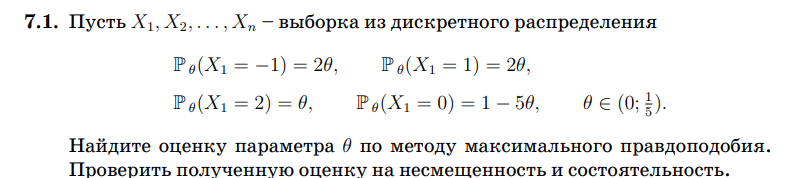

In [1]:
from scipy.optimize import minimize_scalar
import numpy as np

# Предположим, что у нас есть следующая выборка данных:
sample_data = [-1, 0, 1, 2, 0, -1, 1, 0, 2, 0, -1]  # Замените этими значениями реальные данные выборки

# Подсчитываем количество вхождений каждого значения в выборке
k_minus1 = sample_data.count(-1)
k_0 = sample_data.count(0)
k_1 = sample_data.count(1)
k_2 = sample_data.count(2)

# Функция логарифма правдоподобия
def log_likelihood(theta, k_minus1, k_0, k_1, k_2):
    # Убедимся, что theta находится в допустимом диапазоне
    if theta <= 0 or theta >= 0.2:
        return -np.inf  # Возвращаем минус бесконечность, если theta вне диапазона
    return (k_minus1 + k_1) * np.log(2 * theta) + k_2 * np.log(theta) + k_0 * np.log(1 - 5 * theta)

# Минимизируем отрицательный логарифм правдоподобия
res = minimize_scalar(lambda theta: -log_likelihood(theta, k_minus1, k_0, k_1, k_2), bounds=(0, 0.2), method='bounded')

# Проверяем, что оптимизация успешно завершилась
if res.success:
    theta_hat = res.x
    print(f"Оценка параметра θ методом максимального правдоподобия: {theta_hat}")
else:
    print("Оптимизация не удалась.")


Оценка параметра θ методом максимального правдоподобия: 0.1272737979846412


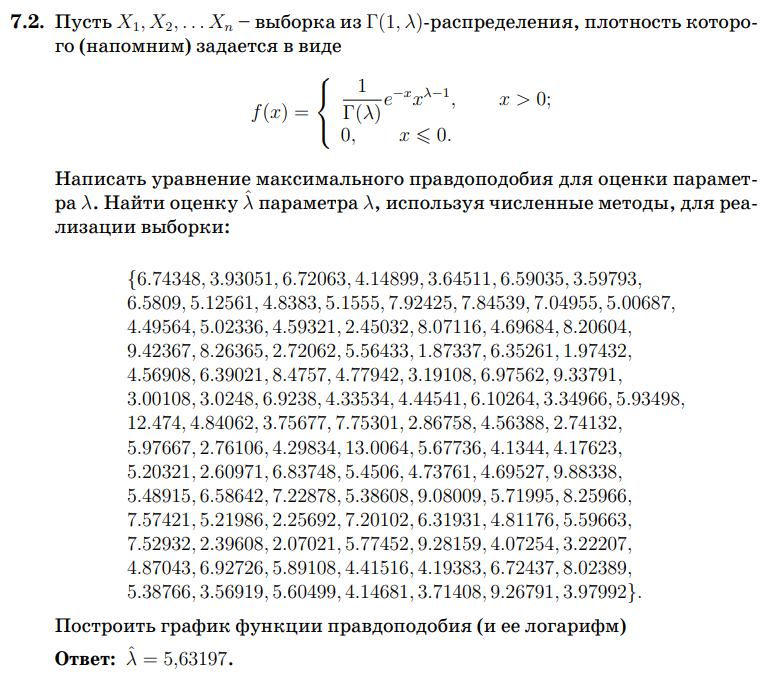

Оценка параметра λ методом максимального правдоподобия: 0.95838


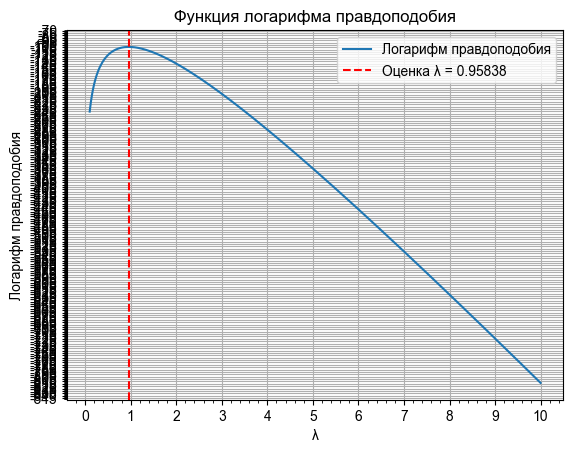

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import matplotlib.ticker as ticker

# Настраиваем отображение русских букв в графиках
plt.rcParams['font.sans-serif'] = ['Arial', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# Генерация случайной выборки из экспоненциального распределения
true_lambda = 1
sample_data = expon.rvs(scale=1/true_lambda, size=100)

# Функция для вычисления оценки параметра λ методом максимального правдоподобия
def mle_lambda(data):
    n = len(data)
    sum_data = np.sum(data)
    lambda_hat = n / sum_data
    return lambda_hat

# Вычисляем оценку параметра λ
lambda_hat = mle_lambda(sample_data)
print(f"Оценка параметра λ методом максимального правдоподобия: {lambda_hat:.5f}")

# Функция логарифма правдоподобия
def log_likelihood(lambda_, data):
    return len(data) * np.log(lambda_) - lambda_ * np.sum(data)

# Генерируем последовательность значений λ для построения графика
lambdas = np.linspace(0.1, 10, 400)
likelihoods = [log_likelihood(l, sample_data) for l in lambdas]

# Построение графика логарифма правдоподобия
plt.plot(lambdas, likelihoods, label='Логарифм правдоподобия')
plt.axvline(x=lambda_hat, color='red', linestyle='--', label=f'Оценка λ = {lambda_hat:.5f}')
plt.title('Функция логарифма правдоподобия')
plt.xlabel('λ')
plt.ylabel('Логарифм правдоподобия')
plt.legend()
plt.grid(True)

# Форматирование чисел на осях для красивого отображения
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.show()
